In [ ]:
!pip install tensorflow==2.0.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 86.3 MB 24 kB/s 
     |████████████████████████████████| 449 kB 38.2 MB/s 
     |████████████████████████████████| 50 kB 2.1 MB/s 
     |████████████████████████████████| 3.8 MB 21.5 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=f5437aec6cb86bb2d07970c988fe31d1ec7d6e5779f881a9dbc8d1970403e65a
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.8.0
    Uninstalling tensorboard-2.8.0:
      Successfully uninstalled tensorboard-2.8.0
  Attempting uni

In [ ]:
!pip install keras==2.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 377 kB 4.4 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [ ]:
#資料前處理
import numpy as np
from keras.datasets import mnist
from keras.utils import to_categorical

#載入資料集
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype("float32")
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype("float32")

#因為是固定範圍，所以執行正規化，從 0 - 255至 0 - 1
x_train = x_train / 255
x_test = x_test / 255

#One-hot encoding
y_train = to_categorical(y_train)
y_test_num = y_test.copy()
y_test = to_categorical(y_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

np.random.seed(7) #指定亂數種子

#定義模型
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5), padding='same', input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(5, 5), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [ ]:
#編譯模型
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
#訓練模型
history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=128, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 60s - loss: 0.4175 - accuracy: 0.8689 - val_loss: 0.0867 - val_accuracy: 0.9735
Epoch 2/10
 - 58s - loss: 0.1382 - accuracy: 0.9580 - val_loss: 0.0592 - val_accuracy: 0.9816
Epoch 3/10
 - 57s - loss: 0.1044 - accuracy: 0.9680 - val_loss: 0.0478 - val_accuracy: 0.9857
Epoch 4/10
 - 58s - loss: 0.0861 - accuracy: 0.9734 - val_loss: 0.0437 - val_accuracy: 0.9866
Epoch 5/10
 - 58s - loss: 0.0750 - accuracy: 0.9774 - val_loss: 0.0391 - val_accuracy: 0.9887
Epoch 6/10
 - 57s - loss: 0.0677 - accuracy: 0.9793 - val_loss: 0.0357 - val_accuracy: 0.9894
Epoch 7/10
 - 57s - loss: 0.0614 - accuracy: 0.9819 - val_loss: 0.0335 - val_accuracy: 0.9901
Epoch 8/10
 - 58s - loss: 0.0568 - accuracy: 0.9821 - val_loss: 0.0337 - val_accuracy: 0.9915
Epoch 9/10
 - 58s - loss: 0.0538 - accuracy: 0.9835 - val_loss: 0.0313 - val_accuracy: 0.9908
Epoch 10/10
 - 58s - loss: 0.0510 - accuracy: 0.9843 - val_loss: 0.0319 - val_accuracy: 0.9913


In [ ]:
#評估模型
print("\nTesting...")
loss, accuracy = model.evaluate(x_train, y_train)
print('訓練资料集的準確度={:.2f}'.format(accuracy))
loss, accuracy = model.evaluate(x_test, y_test)
print('測試资料集的準確度={:.2f}'.format(accuracy))


Testing...
60000/60000 [==============================] - 29s 479us/step
訓練资料集的準確度=0.99
10000/10000 [==============================] - 5s 508us/step
測試资料集的準確度=0.99


In [ ]:
x_train.shape

(60000, 28, 28, 1)

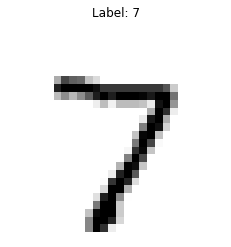

In [ ]:
import matplotlib.pyplot as plt

i = 0
plt.imshow(x_test[i].reshape(28, 28), cmap="binary")
plt.title("Label: " + str(y_test_num[i]))
plt.axis("off")
plt.show()

In [ ]:
probs = model.predict_proba(x_test)

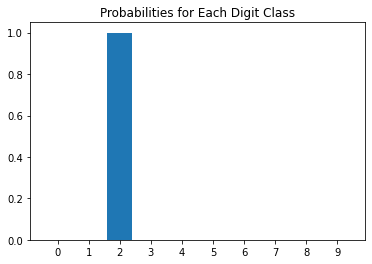

In [ ]:
i = 1

plt.title("Probabilities for Each Digit Class")
plt.bar(np.arange(10), probs[i].reshape(10), align="center")
plt.xticks(np.arange(10), np.arange(10).astype(str))
plt.show()

In [ ]:
wrong = []
for i in range(0, len(x_test)):
  if y_test_num[i] != np.argmax(probs[i]):
    wrong.append(i)

In [ ]:
print(wrong)

[340, 445, 495, 582, 684, 740, 813, 947, 1014, 1033, 1039, 1112, 1226, 1232, 1247, 1260, 1319, 1393, 1522, 1621, 1681, 1721, 1878, 1901, 2035, 2043, 2070, 2109, 2118, 2129, 2135, 2293, 2380, 2387, 2414, 2462, 2597, 2654, 2720, 2896, 2927, 2939, 2953, 3073, 3520, 3767, 3808, 3850, 3869, 4065, 4078, 4176, 4224, 4360, 4369, 4497, 4500, 4740, 4761, 4823, 5937, 5955, 5973, 5997, 6505, 6571, 6576, 6597, 6625, 6651, 8059, 8094, 8316, 8325, 8408, 9009, 9015, 9587, 9634, 9642, 9664, 9692, 9729]


In [ ]:
print(len(wrong))

83


In [ ]:
j = len(wrong)/2 if (len(wrong) % 2) == 0 else int((len(wrong)/2)) + 1

In [ ]:
j

42

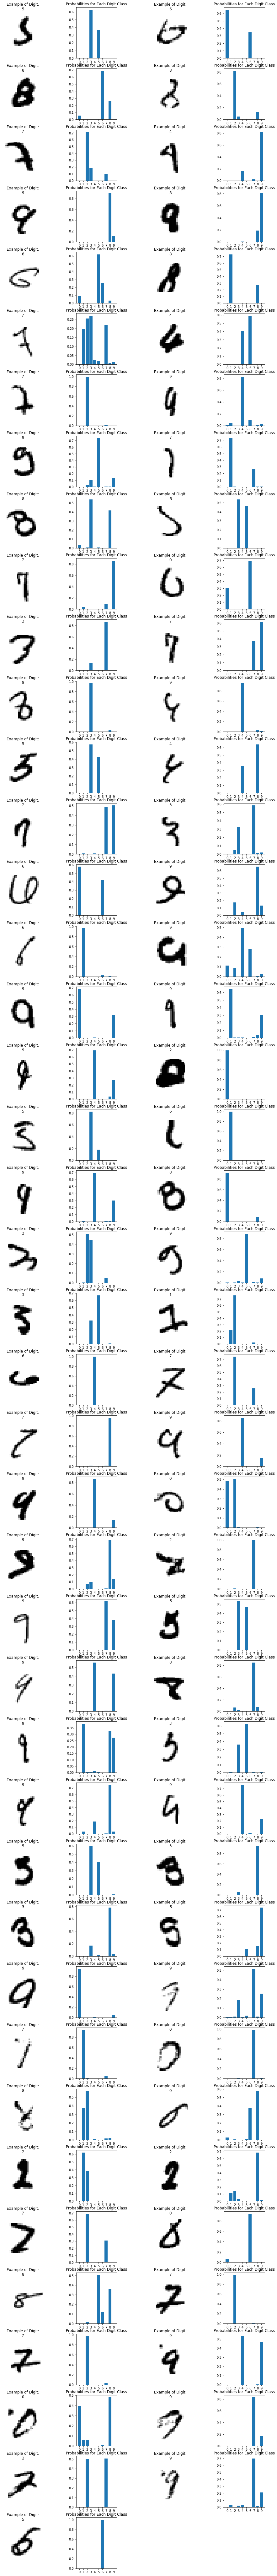

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 150))

k = 1
for i in wrong:

  plt.subplot(j, 4, 2*k-1)
  plt.title("Example of Digit:\n" + str(y_test_num[i]))
  plt.imshow(x_test[i].reshape(28, 28), cmap="binary")
  plt.axis("off")

  plt.subplot(j, 4, 2*k)
  plt.title("Probabilities for Each Digit Class")
  plt.bar(np.arange(10), probs[i].reshape(10), align="center")
  plt.xticks(np.arange(10), np.arange(10).astype(str))

  k += 1

plt.subplots_adjust(wspace=.8)
plt.show()